# Oil Well Site Selection

# Introduction
Oily Giant wants to drill a new oil well. Before they do this, they need to know where to drill the new well. There are three regions available for well drilling. This goal of this analysis is to identify the most profitable region to drill a new well.

- Method: I begin by training linear regression models on the 3 datasets provided. From this model, I select the oil wells that have the highest predicted reserve volumes. Of these selected wells, I perform calculations to assess which region is most profitable.
  
- Data Description: Data consists of 3 CSV files. Each file contains wells from a region. In addition to an identifying well ID, each row includes three estimated values (f0,f1,f2) and a 'product' value which is an estimation of the well volume.

**Steps to choose the location:**
- Collect the oil well parameters in the selected region: oil quality and volume of reserves
- Build a model for predicting the volume of reserves in the new wells
- Pick the oil wells with the highest estimated values
- Pick the region with the highest total profit for the selected oil wellss.

## Download and Prepare Data

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading CSV files to DataFrames
- The number at the end of each denotes the region (0,1,2).

In [3]:
try:
    data0 = pd.read_csv('/datasets/geo_data_0.csv')
    data1 = pd.read_csv('/datasets/geo_data_1.csv')
    data2 = pd.read_csv('/datasets/geo_data_2.csv')
except FileNotFoundError:
    data0 = pd.read_csv('geo_data_0.csv')
    data1 = pd.read_csv('geo_data_1.csv')
    data2 = pd.read_csv('geo_data_2.csv')

### Exploring Data Features
- Each region contains the same parameters. An Id for each well, three 'f' metrics, and a the amount of 'product' in each well.
- For the 'product' column, each unit represents 1000 barrels of oil.
- The means for product are different for each region: region 0 = 92.5, region 1 = 68.8, region 2 = 95.
- There is no missing data in any of the dataframes.

#### Region 0 Data:

In [4]:
data0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
data0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


#### Region 1 Data:

In [7]:
data1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


#### Region 2 Data:

In [10]:
data2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
data2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


### Separating Features and Target Data

In [13]:
features0 = data0.drop(['product','id'],axis=1) 
target0 = data0['product']
features1 = data1.drop(['product','id'],axis=1)
target1 = data1['product']
features2 = data2.drop(['product','id'],axis=1)
target2 = data2['product']

## Train and Test Model for Each Region

### Splitting Data into Train and Validation Sets:

In [14]:
features0_train, features0_valid, target0_train, target0_valid = train_test_split(features0,target0,test_size=0.25,random_state=12345)
features1_train, features1_valid, target1_train, target1_valid = train_test_split(features1,target1,test_size=0.25,random_state=12345)
features2_train, features2_valid, target2_train, target2_valid = train_test_split(features2,target2,test_size=0.25,random_state=12345)

### Scaling Data:

In [15]:
scaler = StandardScaler()
scaler.fit(features0_train)
features0_train = scaler.transform(features0_train)
features0_valid = scaler.transform(features0_valid)

In [16]:
scaler = StandardScaler()
scaler.fit(features1_train)
features1_train = scaler.transform(features1_train)
features1_valid = scaler.transform(features1_valid)

In [17]:
scaler = StandardScaler()
scaler.fit(features2_train)
features2_train = scaler.transform(features2_train)
features2_valid = scaler.transform(features2_valid)

### Training Models:

#### Training Model for Region 0:

In [18]:
model0 = LinearRegression()
model0.fit(features0_train,target0_train)
predicted0_valid = model0.predict(features0_valid)
predicted0_valid = pd.Series(predicted0_valid)
predicted0_valid

0         95.894952
1         77.572583
2         77.892640
3         90.175134
4         70.510088
            ...    
24995    103.037104
24996     85.403255
24997     61.509833
24998    118.180397
24999    118.169392
Length: 25000, dtype: float64

#### Calculating Average Volume of Predicted Product:
- In this case the average volume of predicted product is near the average volume of the target product.

In [19]:
avg_vol_0 = predicted0_valid.mean()
avg_vol_0

92.59256778438035

In [20]:
avg_target0 = target0_valid.mean()
avg_target0

92.07859674082927

#### Plotting Distribution of Predicted and Target Values:
- The distribution of the predicted product shows less spread and a greater concentration around the mean, whereas the target product is shows more spread and less concentration around the mean.

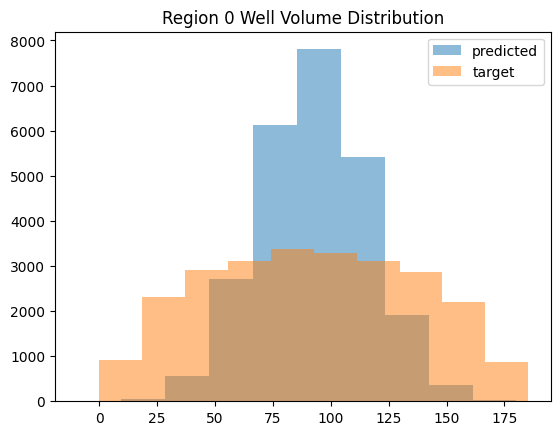

In [21]:
plt.hist(predicted0_valid,
        alpha=0.5,
        label='predicted')
plt.hist(target0_valid,
        alpha=0.5,
        label='target')
plt.legend()
plt.title('Region 0 Well Volume Distribution')
plt.show()

#### Calculating RMSE of Model: 

In [22]:
mse = mean_squared_error(target0_valid,predicted0_valid)
rmse0 = mse ** 0.5
print(f'Region 0 Model RMSE: {rmse0:.3f}')

Region 0 Model RMSE: 37.579


#### Training Model for Region 1:

In [23]:
model1 = LinearRegression()
model1.fit(features1_train,target1_train)
predicted1_valid = model1.predict(features1_valid)
predicted1_valid = pd.Series(predicted1_valid)
predicted1_valid

0         82.663314
1         54.431786
2         29.748760
3         53.552133
4          1.243856
            ...    
24995    136.869211
24996    110.693465
24997    137.879341
24998     83.761966
24999     53.958466
Length: 25000, dtype: float64

#### Calculating Average Volume of Predicted Product:

In [24]:
avg_vol_1 = predicted1_valid.mean()
avg_vol_1

68.728546895446

In [25]:
avg_target1 = target1_valid.mean()
avg_target1

68.72313602435997

#### Plotting Distribution of Predicted and Target Values:
- Unlike the previous distribution, neither the predicted nor target distributions have a normal distribution. The largest volumes of the both the predicted and target product are around 0 and 140.

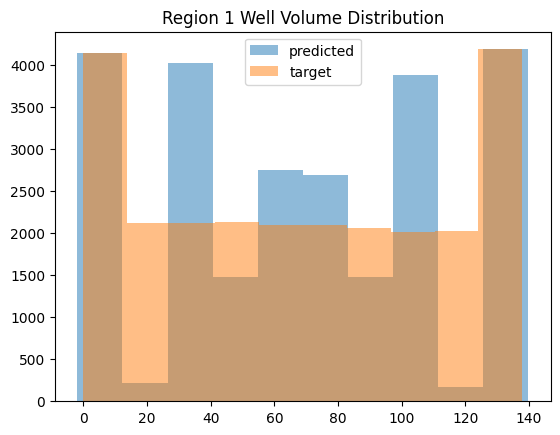

In [26]:
plt.hist(predicted1_valid,
        alpha=0.5,
        label='predicted')
plt.hist(target1_valid,
        alpha=0.5,
        label='target')
plt.legend()
plt.title('Region 1 Well Volume Distribution')
plt.show()

#### Calculating RMSE of Model:

In [27]:
mse = mean_squared_error(target1_valid,predicted1_valid)
rmse1 = mse ** 0.5
print(f'Region 1 Model RMSE: {rmse1:.3f}')

Region 1 Model RMSE: 0.893


#### Training Model for Region 2:

In [28]:
model2 = LinearRegression()
model2.fit(features2_train,target2_train)
predicted2_valid = model2.predict(features2_valid)
predicted2_valid = pd.Series(predicted2_valid)
predicted2_valid

0         93.599633
1         75.105159
2         90.066809
3        105.162375
4        115.303310
            ...    
24995     78.765887
24996     95.603394
24997     99.407281
24998     77.779912
24999    129.032417
Length: 25000, dtype: float64

#### Calculating Average Volume of Predicted Product:

In [29]:
avg_vol_2 = predicted2_valid.mean()
avg_vol_2

94.96504596800489

In [30]:
avg_target2 = target2_valid.mean()
avg_target2

94.88423280885438

#### Plotting Distribution of Predicted and Target Values:
- Like the distribution for region 0, this distribution follows a mostly normal distribution, with the target product having greater spread than the predicted product.

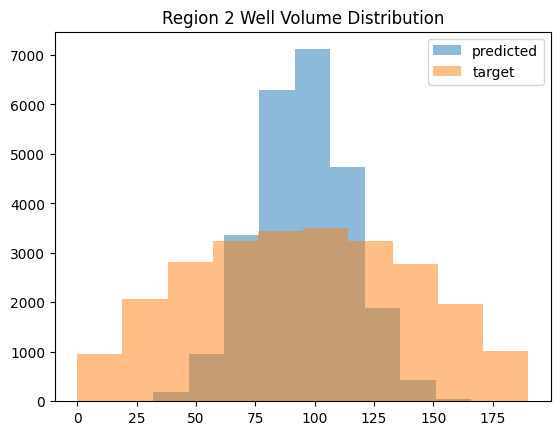

In [31]:
plt.hist(predicted2_valid,
        alpha=0.5,
        label='predicted')
plt.hist(target2_valid,
        alpha=0.5,
        label='target')
plt.legend()
plt.title('Region 2 Well Volume Distribution')
plt.show()

#### Calculating RMSE of Model:

In [32]:
mse = mean_squared_error(target2_valid,predicted2_valid)
rmse2 = mse ** 0.5
print(f'Region 2 Model RMSE: {rmse2:.3f}')

Region 2 Model RMSE: 40.030


## Prepare for Profit Calculation

### Set Variables for Calculation:
- The company has 100 million budgeted for the new wells.
- Once a region is selected, they will take 500 samples. From these 500 samples, the 200 best wells will be selected.
- For every 1000 barrels (1 for the product value), revenue is 4500.

In [33]:
budget = 100000000
unit_rev = 4500 # per 1000 barrel unit
num_wells = 200 # highest volume selected from 500 samples

### Determine total units needed:
- Here I calculate how many total units (1000 barrels) the company needs to cover the cost (100 million). 

In [34]:
# Total units needed to break even
total_units = budget / unit_rev
print(f'Minimum total units needed: {total_units:.3f}')

Minimum total units needed: 22222.222


### Determine average volume of well needed:
- Since the company will only drill 200 wells, I calculate the minimum volume of each well to meet the total units requirement.

In [35]:
# Average volume of well needed
avg_vol = total_units / num_wells
print(f'Minimum Average Well Volume needed: {avg_vol:.3f}')

Minimum Average Well Volume needed: 111.111


### Determine average volume of top 200 wells in each region:
- Here I calculate the average capacities of the top 200 wells for each of the three regions. All exceed the minimum average volume of 111.1.

#### Average Volume Region 0:

In [36]:
top200_0 = predicted0_valid.sort_values(ascending=False).head(200)
top200_0_mean = top200_0.mean()
top200_0_mean

155.511654194057

#### Average Volume Region 1:

In [37]:
top200_1 = predicted1_valid.sort_values(ascending=False).head(200)
top200_1_mean = top200_1.mean()
top200_1_mean

138.73013391081713

#### Average Volume Region 2:

In [38]:
top200_2 = predicted2_valid.sort_values(ascending=False).head(200)
top200_2_mean = top200_2.mean()
top200_2_mean

148.01949329159186

## Write Function to Calculate Profit from Selected Oil Wells

### Prepare data:

In [39]:
target0_valid.reset_index(inplace=True,drop=True)
target1_valid.reset_index(inplace=True,drop=True)
target2_valid.reset_index(inplace=True,drop=True)

### Profit Function:
- I begin by identifying the top wells for the region by sorting predicted product in descending order. I save the indexes of the top 200 and use this to find the same wells in the target product Series. These are added and multiplied by the revenue per unit. Lastly, I subtract the budget from the revenue.
- This serves as the 'best case' scenario for each region since it is unlikely that only the best wells will be selected.

In [40]:
def profit(target, predictions, count):
    predictions = pd.Series(predictions)
    top_wells = predictions.sort_values(ascending=False).head(count).index
    total_reserves = target.loc[top_wells].sum()
    revenue = total_reserves * unit_rev
    profit = revenue - budget
    return profit

### Calculate Profit for Each region:

#### Profit for Region 0:

In [41]:
profit(target0_valid,predicted0_valid,200)

33208260.43139851

#### Profit for Region 1:

In [42]:
profit(target1_valid,predicted1_valid,200)

24150866.966815114

#### Profit for Region 2:

In [43]:
profit(target2_valid,predicted2_valid,200)

27103499.635998324

## Calculate Risks and Profit for Each Region

### Defining Bootstrap Function: 
- To assess risk and get a more realistic estimate for the actual amount of revenue the company can gain, the bootstrapping technique is used.
- Since the company will test 500 wells before selecting 200 from those 500, I have set the sample size to 500. Sampling is also with replacement, so the same well can be selected more than once.
- 1000 samples are made and the profit is calculated. Profit of the sample is added to a list of values. From here the upper and lower values of a 95% confidence interval are returned as well as the mean and risk of loss.

In [44]:
def bootstrap(target, predictions, count):
    predictions = pd.Series(predictions)
    
    values = []

    state = np.random.RandomState(12345)

    for i in range(1000):
        target_subsample= target.sample(n=500, replace=True, random_state=state)
        probs_subsample = predictions.iloc[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample, count))

    values = pd.Series(values)
    
    upper = values.quantile(0.975)
    lower = values.quantile(0.025)    
    mean = values.mean()
    
    loss = 0
    for i in values:
        if i < 0:
            loss += 1
    
    risk_loss = loss / len(values)

    return upper, lower, mean, risk_loss

### Using Function for Each Region:

#### Region 0:

In [45]:
upper,lower,mean,risk_loss = bootstrap(target0_valid,predicted0_valid,200)

In [46]:
print("With 95% confidence, we can say that the mean profit will fall somewhere between {0:,.0f} and {1:,.0f}.".format(upper,lower))
print("Mean: {:,.0f}".format(mean))
print("Risk of loss: {:,.2%}".format(risk_loss))

With 95% confidence, we can say that the mean profit will fall somewhere between 12,311,636 and 129,483.
Mean: 6,007,352
Risk of loss: 2.00%


#### Region 1:

In [47]:
upper,lower,mean,risk_loss = bootstrap(target1_valid,predicted1_valid,200)

In [48]:
print("With 95% confidence, we can say that the mean profit will fall somewhere between {0:,.0f} and {1:,.0f}.".format(upper,lower))
print("Mean: {:,.0f}".format(mean))
print("Risk of loss: {:,.2%}".format(risk_loss))

With 95% confidence, we can say that the mean profit will fall somewhere between 11,976,416 and 1,579,885.
Mean: 6,652,411
Risk of loss: 0.30%


#### Region 2:

In [49]:
upper, lower, mean, risk_loss = bootstrap(target2_valid,predicted2_valid,200)

In [50]:
print("With 95% confidence, we can say that the mean profit will fall somewhere between {0:,.0f} and {1:,.0f}.".format(upper,lower))
print("Mean: {:,.0f}".format(mean))
print("Risk of loss: {:,.2%}".format(risk_loss))

With 95% confidence, we can say that the mean profit will fall somewhere between 12,306,445 and -122,185.
Mean: 6,155,597
Risk of loss: 3.00%


# Conclusion
- I recommend that Oily Giant drills wells in Region 1. Of the three regions, Region 1 has the highest average profit at approximately 6,652,000 and the lowest risk of loss at 0.3%.